# Employee Turnover Prediction

In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report, roc_auc_score)
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
attrition = pd.read_csv('Employee-Attrition.csv')

In [3]:
#only 237 yes in attrtion (1/5 is imbalanced data)
attrition[attrition['Attrition'] == 'Yes']

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [4]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Data Exploration

/Users/richtsai1103/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/richtsai1103/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/richtsai1103/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

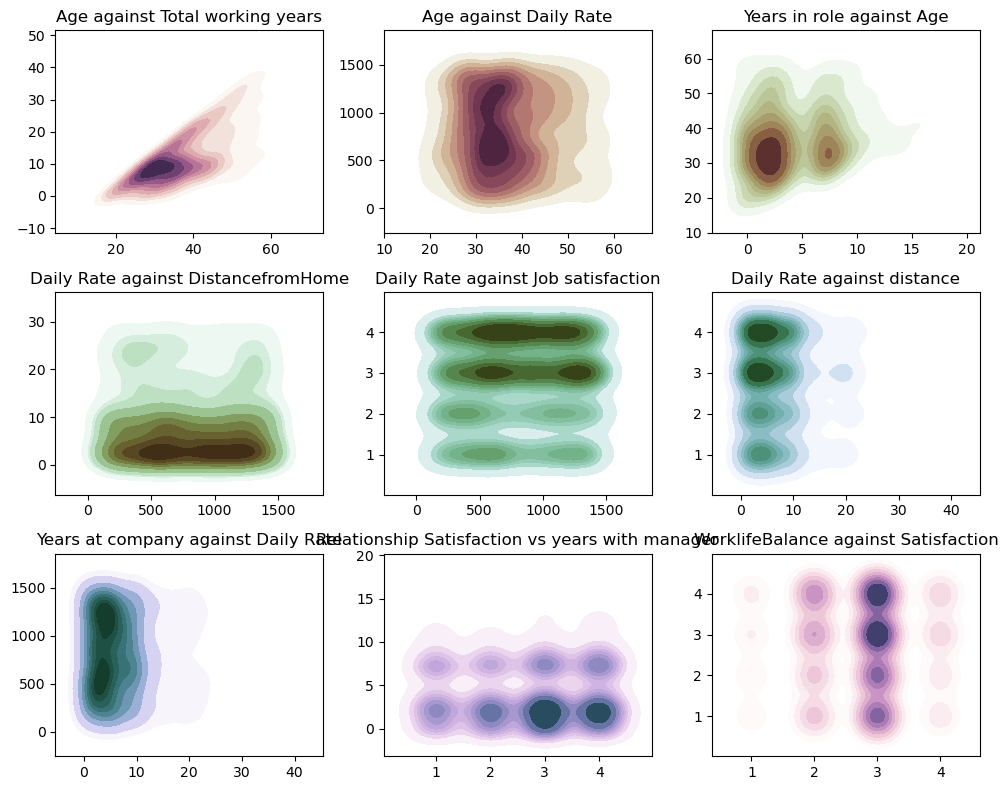

In [5]:
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

In [6]:
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']

In [7]:
#Look at correlation between variables
attrition[numerical]

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,2062,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2064,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,2065,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


<AxesSubplot:>

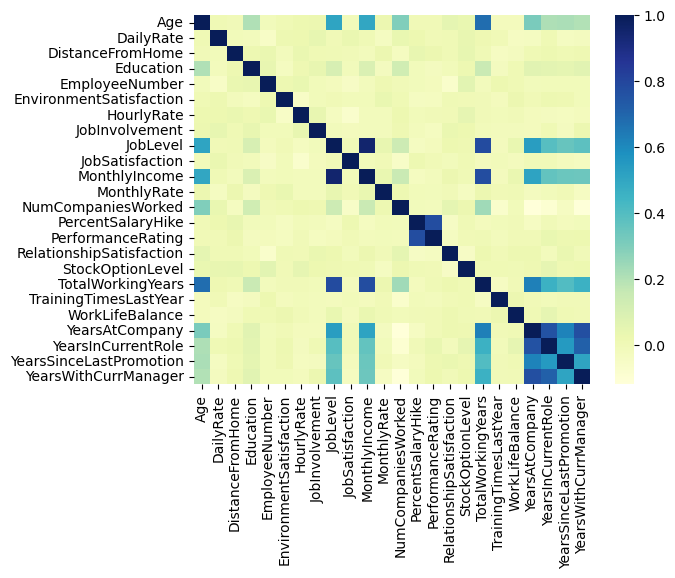

In [8]:
sns.heatmap(attrition[numerical].corr(), cmap="YlGnBu")

## Data preprocessing 

In [20]:
attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)

In [21]:
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)
attrition_num = attrition[numerical]
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [22]:
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])

## Random Forest Classifer

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [24]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.57      0.49      0.53        49

    accuracy                           0.85       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



Text(0, 0.5, 'Importance')

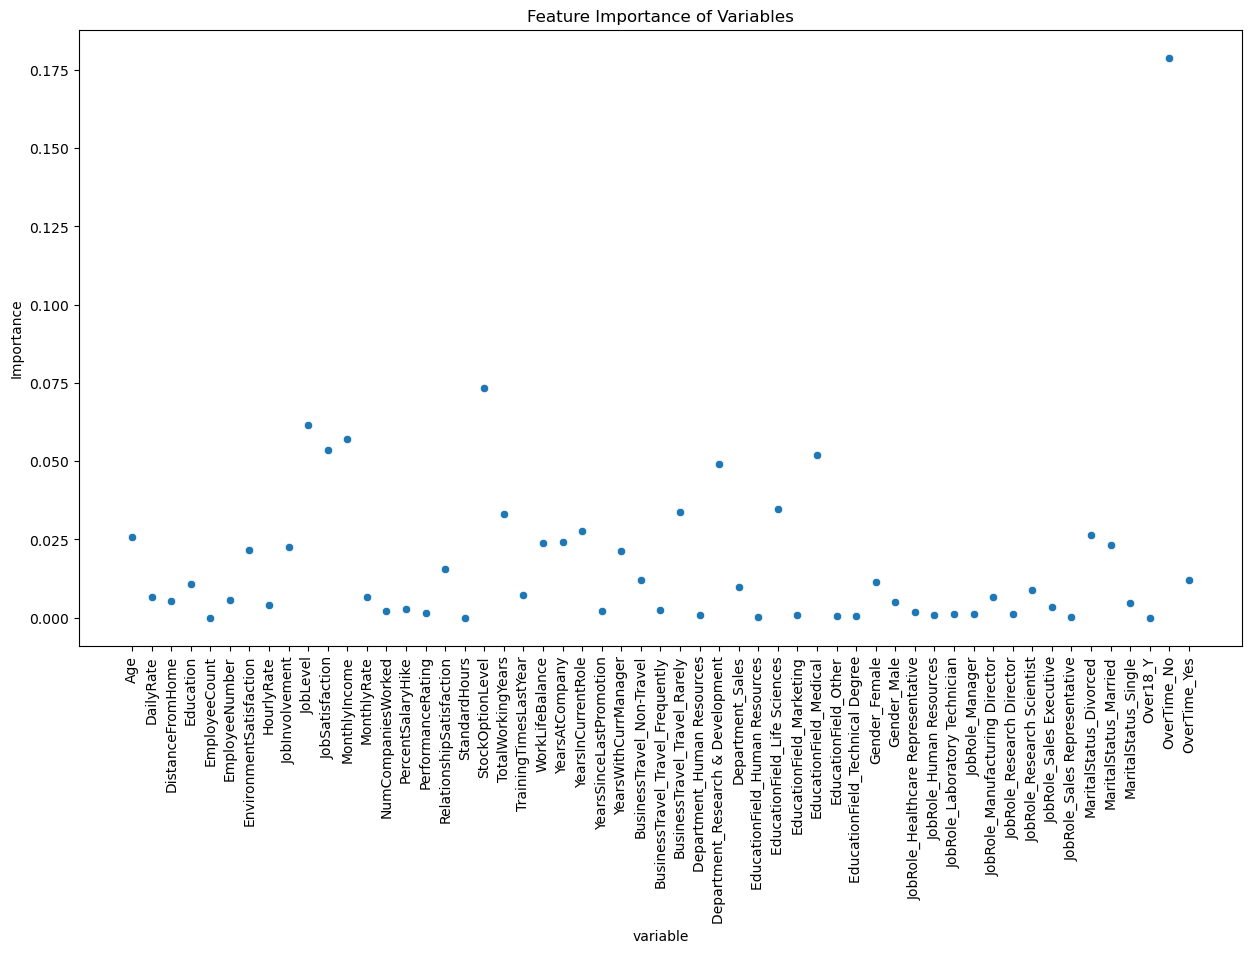

In [25]:
x = attrition_final.columns.values
y = rf.feature_importances_
df = pd.DataFrame({'cat': x, 'imp' : y}, columns = ['cat','imp'])
plt.figure(figsize = (15,8))
ax = sns.scatterplot(x="cat", y="imp", data=df)
plt.xticks(rotation=90)
plt.title("Feature Importance of Variables")
plt.xlabel("variable")
plt.ylabel("Importance")

## XGBoost Classifer

In [133]:
gb = GradientBoostingClassifier(n_estimators = 150)
gb.fit(smote_train, smote_target)
gb_predictions=gb.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, xgb_predictions)))
print("="*80)
print(classification_report(target_val, xgb_predictions))

Accuracy score: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       245
           1       0.73      0.39      0.51        49

    accuracy                           0.87       294
   macro avg       0.81      0.68      0.72       294
weighted avg       0.86      0.87      0.86       294



In [128]:
def modelfit(alg, useTrainCV=True, cv_folds=5, early_stopping_rounds=50): 
    
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(smote_train.values, label=smote_target.values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=100)
    alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(smote_train, smote_target,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(smote_train)
    dtrain_predprob = alg.predict_proba(smote_train)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy (Train) : %.4g" % accuracy_score(smote_target.values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(smote_target, dtrain_predprob))
    
    if useTrainCV != True:
        test_predictions = alg.predict(test)
        test_predprob = alg.predict_proba(test)[:,1]
        print("\nModel Report")
        print("Accuracy (Test): %.4g" % accuracy_score(target_val.values, test_predictions))
        print("AUC Score (Test): %f" % roc_auc_score(target_val, test_predprob))
    # Get the booster from the xgbmodel
    booster = alg.get_booster()
    # Get the importance dictionary (by gain) from the booster
    importance = booster.get_score(importance_type="gain")
    for key in importance.keys():
        importance[key] = round(importance[key],2)
    ax = xgb.plot_importance(importance, max_num_features=8, importance_type='gain', show_values=True)

[0]	train-auc:0.91989+0.00544	test-auc:0.87938+0.00941
[100]	train-auc:0.99998+0.00003	test-auc:0.97387+0.00703
[200]	train-auc:1.00000+0.00000	test-auc:0.97583+0.00701
[300]	train-auc:1.00000+0.00000	test-auc:0.97655+0.00694
[400]	train-auc:1.00000+0.00000	test-auc:0.97686+0.00676
[500]	train-auc:1.00000+0.00000	test-auc:0.97685+0.00672
[600]	train-auc:1.00000+0.00000	test-auc:0.97718+0.00673
[627]	train-auc:1.00000+0.00000	test-auc:0.97715+0.00667


/Users/richtsai1103/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy (Train) : 1
AUC Score (Train): 1.000000


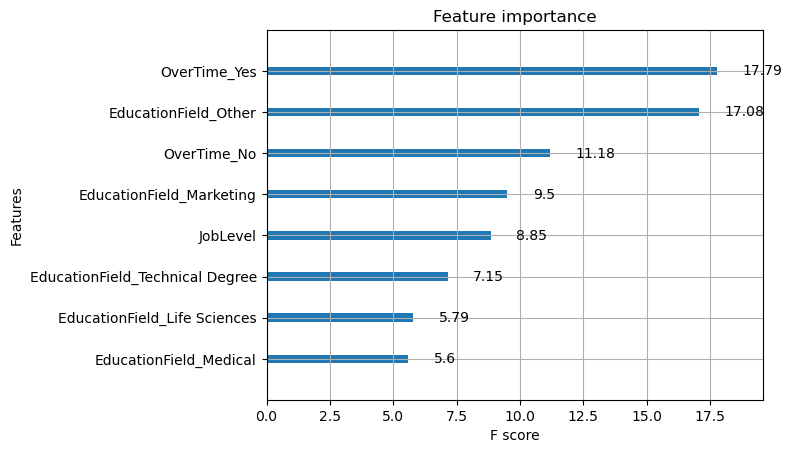

In [124]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1)

[0]	train-auc:0.91989+0.00544	test-auc:0.87938+0.00941
[100]	train-auc:0.99998+0.00003	test-auc:0.97387+0.00703
[200]	train-auc:1.00000+0.00000	test-auc:0.97583+0.00701
[300]	train-auc:1.00000+0.00000	test-auc:0.97655+0.00694
[400]	train-auc:1.00000+0.00000	test-auc:0.97686+0.00676
[500]	train-auc:1.00000+0.00000	test-auc:0.97685+0.00672
[600]	train-auc:1.00000+0.00000	test-auc:0.97718+0.00673
[627]	train-auc:1.00000+0.00000	test-auc:0.97715+0.00667


/Users/richtsai1103/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy (Train) : 1
AUC Score (Train): 1.000000

Model Report
Accuracy (Test): 0.8605
AUC Score (Test): 0.825656


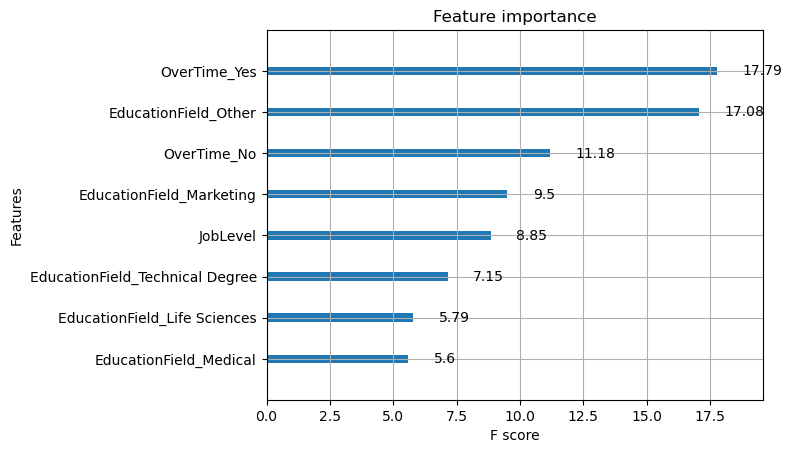

In [129]:
xgb_test1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb_test1, useTrainCV=False)

### Tuning

In [106]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(smote_train, smote_target)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.50473228, 1.0221715 , 1.06137543, 2.31807742, 1.84203987,
         1.90867562, 2.12523746, 3.17810082, 2.04846764, 4.68064361,
         2.65760484, 2.00786633]),
  'std_fit_time': array([0.19957628, 0.02325298, 0.05395541, 0.32449852, 0.34566079,
         0.31897519, 0.20828438, 0.86243777, 0.17553072, 1.3550546 ,
         0.30108655, 0.20359583]),
  'mean_score_time': array([0.00987549, 0.00808606, 0.00964003, 0.00896621, 0.00783167,
         0.00802536, 0.00746837, 0.00778131, 0.0087007 , 0.01067371,
         0.00948658, 0.00860658]),
  'std_score_time': array([0.0026271 , 0.00131218, 0.00248196, 0.00152446, 0.00053171,
         0.00060125, 0.00067202, 0.00020423, 0.00135419, 0.00315979,
         0.00172357, 0.00182466]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [109]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(smote_train, smote_target)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, 0.9792242788858694)

In [112]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(smote_train, smote_target)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.7, 'subsample': 0.8}, 0.9795153503967533)

In [117]:
param_test4 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(smote_train, smote_target)
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.65, 'subsample': 0.85}, 0.979902548015146)

In [118]:
param_test5 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.85, colsample_bytree=0.65,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(smote_train, smote_target)
gsearch5.best_params_, gsearch5.best_score_

({'reg_alpha': 0.01}, 0.9800041899795783)

[0]	train-auc:0.89605+0.01729	test-auc:0.84930+0.01694
[100]	train-auc:0.99998+0.00002	test-auc:0.97420+0.00539
[200]	train-auc:1.00000+0.00000	test-auc:0.97589+0.00518
[242]	train-auc:1.00000+0.00000	test-auc:0.97584+0.00557


/Users/richtsai1103/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy (Train) : 1
AUC Score (Train): 1.000000


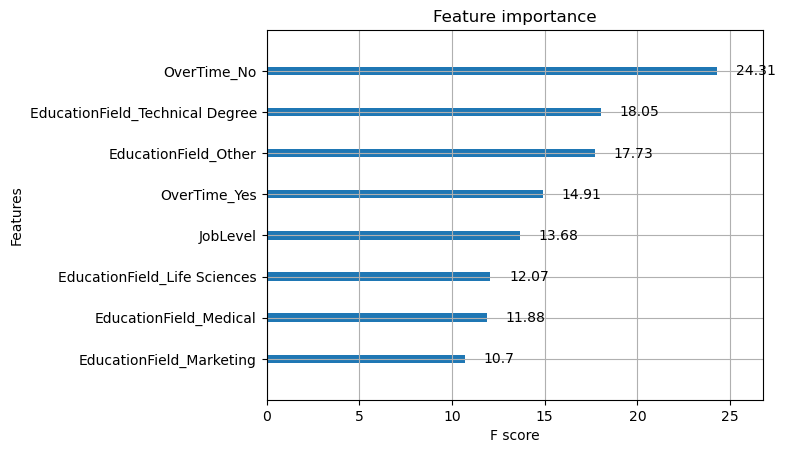

In [120]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.65,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_alpha = 0.01,
 seed=27)
modelfit(xgb2)

[0]	train-auc:0.89605+0.01729	test-auc:0.84930+0.01694
[100]	train-auc:0.98962+0.00094	test-auc:0.96483+0.00755
[200]	train-auc:0.99400+0.00040	test-auc:0.96897+0.00736
[300]	train-auc:0.99677+0.00031	test-auc:0.97182+0.00673
[400]	train-auc:0.99830+0.00017	test-auc:0.97304+0.00659
[500]	train-auc:0.99911+0.00013	test-auc:0.97396+0.00648
[600]	train-auc:0.99956+0.00007	test-auc:0.97470+0.00630
[700]	train-auc:0.99979+0.00005	test-auc:0.97504+0.00657
[800]	train-auc:0.99991+0.00003	test-auc:0.97539+0.00628
[900]	train-auc:0.99996+0.00001	test-auc:0.97555+0.00636
[1000]	train-auc:0.99998+0.00001	test-auc:0.97574+0.00620
[1100]	train-auc:0.99999+0.00000	test-auc:0.97590+0.00622
[1200]	train-auc:1.00000+0.00000	test-auc:0.97609+0.00629
[1300]	train-auc:1.00000+0.00000	test-auc:0.97625+0.00616
[1400]	train-auc:1.00000+0.00000	test-auc:0.97642+0.00626
[1500]	train-auc:1.00000+0.00000	test-auc:0.97655+0.00617
[1600]	train-auc:1.00000+0.00000	test-auc:0.97660+0.00626
[1642]	train-auc:1.00000+0

/Users/richtsai1103/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy (Train) : 0.9995
AUC Score (Train): 1.000000


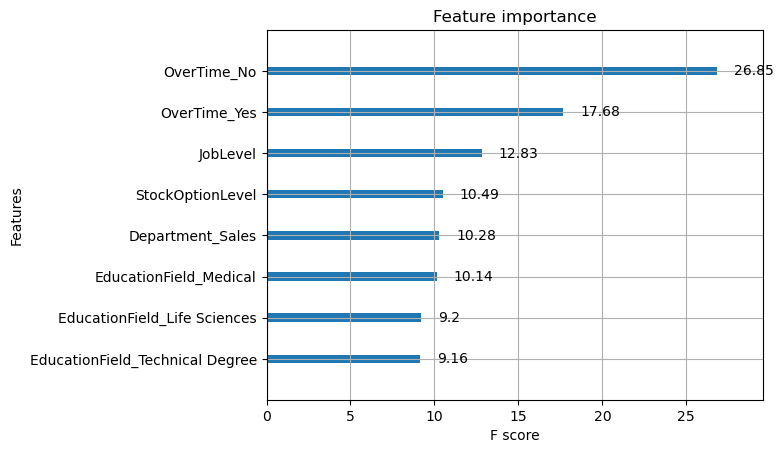

In [151]:
#reducing learning rate and add more estimators(trees)
xgb3 = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=1200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.65,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_alpha = 0.01,
 seed=27)
modelfit(xgb3)

[0]	train-auc:0.89605+0.01729	test-auc:0.84930+0.01694
[100]	train-auc:0.98962+0.00094	test-auc:0.96483+0.00755
[200]	train-auc:0.99400+0.00040	test-auc:0.96897+0.00736
[300]	train-auc:0.99677+0.00031	test-auc:0.97182+0.00673
[400]	train-auc:0.99830+0.00017	test-auc:0.97304+0.00659
[500]	train-auc:0.99911+0.00013	test-auc:0.97396+0.00648
[600]	train-auc:0.99956+0.00007	test-auc:0.97470+0.00630
[700]	train-auc:0.99979+0.00005	test-auc:0.97504+0.00657
[800]	train-auc:0.99991+0.00003	test-auc:0.97539+0.00628
[900]	train-auc:0.99996+0.00001	test-auc:0.97555+0.00636
[1000]	train-auc:0.99998+0.00001	test-auc:0.97574+0.00620
[1100]	train-auc:0.99999+0.00000	test-auc:0.97590+0.00622
[1199]	train-auc:1.00000+0.00000	test-auc:0.97613+0.00629


/Users/richtsai1103/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy (Train) : 0.997
AUC Score (Train): 0.999987

Model Report
Accuracy (Test): 0.8639
AUC Score (Test): 0.818492


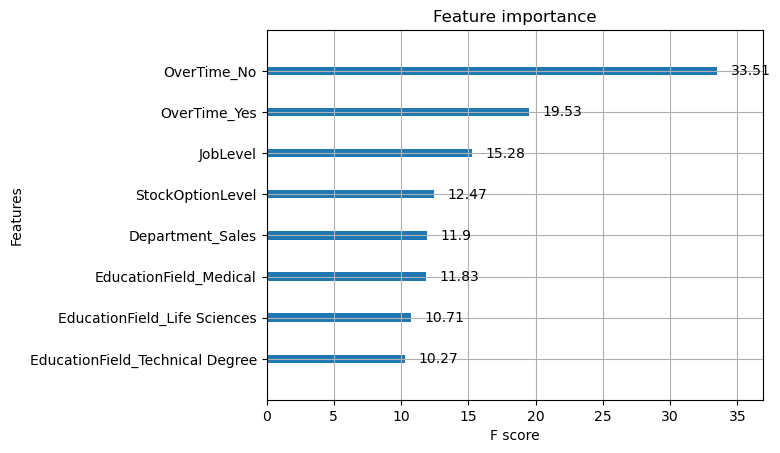

In [171]:
xgb3 = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=1200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.85,
 colsample_bytree=0.65,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 reg_alpha = 0.01,
 seed=27)
modelfit(xgb3, useTrainCV=False)

In [169]:
#since our data is imbalanced, we look at auc score more than accuracy score
sum(target_val), len(target_val)

(49, 294)